# COMP 7150 Assignment 1

**Due at midnight 01/31/2023**


NAME: P$P

---

**Academic misconduct**

If you use code that you did not write yourself, mention the source explicitly. If this is not done, you commit plagirism.  You can discuss, explain, get help from your classmate on how to solve a problem.  If the code or writing is not yours, it is plagiarism.   Plagiarism results in a grade of 0 for the assignment.  There might be an additional penalty and report to the department and college.

Please review additional information about academic misconduct: https://www.memphis.edu/osa/students/academic-misconduct.php


**How each problem is graded**

This is a general guideline.  There might be some variant for a specific problem.

* Answering the question in English: 25%
    + Thorough answering the question, explaning the findings, discussing the comparison: 10-25%
    + Not answering the question in English: 0%.
    + Note: An answer is written in English to address a specific question. The answer must come first.  
* Code: 50%
    + Code is correct: 50%
    + Code is correct, but missing some minor elements: 25-40%
    + Incorrect solution, but make an effort: 10%-25%
    + Empty: 0% 
    + Note: code is not an answer. Code shows how you get an answer.  Code comes after an answer.
* Explanation of code: 10%
    + Concise English explanation of solution/code: 10%
    + No explanation: 0%
* Testing: 15%
    + Providing adequate testing of code: 15%
    + Code operational but does not show how the answer(s) were generated: 5%
    + Code not runnable or no testing: 0%


If a problem has multiple parts, then the points are equally divided.  For example, if a 10-point problem has 2 parts, then each part is given 5 points. And each part is graded based on the same criteria.


**How to turn in your assignment**

+ Export your notebook to an HTML file.
+ Upload it to the appropriate folder in Assignments on Canvas.

---

### Information

Datasets you will use for this assignment are: tips.csv, iris.csv

Each question is worth 20 points.

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
iris_data=load_iris()
features=iris_data.feature_names
iris_df=pd.DataFrame(iris_data.data,columns=features)
iris_df['Species']=iris_data.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


---

**Problem 1**

For each iris species, select all data whose petal widths are greater than the overall average (of all species).

Report on the counts and averages of petal widths of each species.

In [2]:
avg_petal_width = iris_df['petal width (cm)'].mean()
more_than_avg= iris_df[iris_df['petal width (cm)']>avg_petal_width]
more_than_avg

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
iris_df.groupby('Species')['petal width (cm)'].agg(['count','mean'])

,count,mean
Species,,
0,50,0.246
1,50,1.326
2,50,2.026


---

**Problem 2**

Are tip percentages "normal", i.e. is it normally distributed?

Use the shapiro statistical test to answer this question.

Additionally, draw the distribution of tip percentages to answer this question.


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

(0.7994404435157776, 5.1247445455130796e-17)
We have sufficeint evidence to reject the null and indicate that sample is not normally distributed.


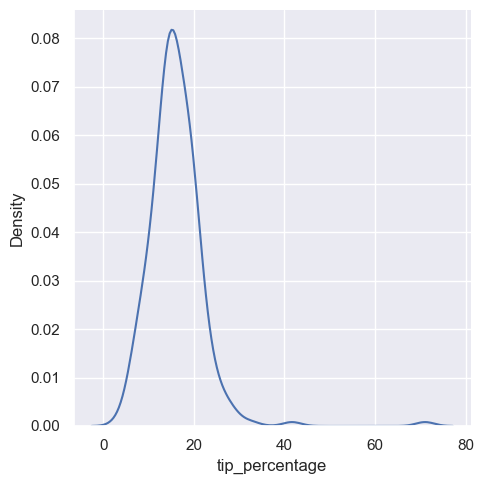

In [5]:
from scipy.stats import shapiro
#In shapiro Ho is 'sample is normally distributed'
tips=pd.read_csv('./../Sem_2/iris_tips_assignment/tips.csv')
tips['tip_percentage']=round(tips['tip']/tips['total_bill'],4)*100
alpha,p_value=shapiro(tips['tip_percentage'])
print((alpha,p_value))
if(p_value>0.05):
    print('We fail to reject the null and extend our to indicate that sample is normally distributed. Conforming with kde plot')
else:
    print('We have sufficeint evidence to reject the null and indicate that sample is not normally distributed.')
    
sns.displot(data=tips,x='tip_percentage',kind='kde')

---

**Problem 3**

Use Python, do not use Pandas, to do this problem.

Compare the average amount of tips and average percentage of tips between males and females on weekends.

A comparison must include an explanation of the code, a report of the finding, and a discussion or conclusion based on the finding.

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05
2,21.01,3.50,Male,No,Sun,Dinner,3,16.66
3,23.68,3.31,Male,No,Sun,Dinner,2,13.98
4,24.59,3.61,Female,No,Sun,Dinner,4,14.68


In [7]:
#Using pandas
tips[tips['day'].isin(['Sat','Sun']) ].groupby('sex',as_index=False)[['tip','tip_percentage']].mean().rename(columns={'tip':'Average tips','tip_percentage':'Average percentage tips'})

,sex,Average tips,Average percentage tips
0,Female,3.023043,16.628478
1,Male,3.151538,15.691197


In [8]:
#Using normal method


---

**Problem 4**

Visualize the distribution of tip percentages in relation to (or as a function of)  total bill.

Discuss the finding.  Specifically, discuss the concentration of tip percentages and its relation to total bill.

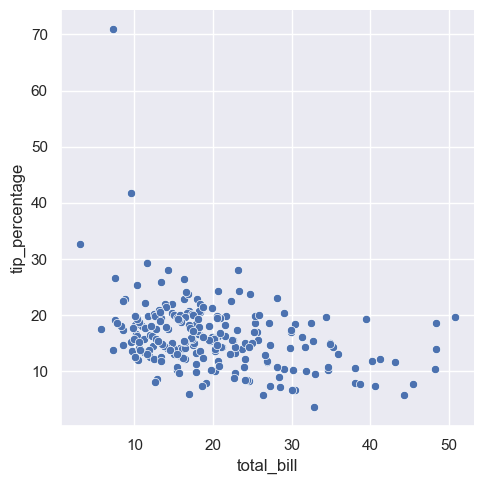

In [9]:
sns.relplot(data=tips,kind='scatter',x='total_bill',y='tip_percentage')

---

**Problem 5**

Describe the distinguishable characteristics of big tippers.  Examine all features/attributes and describe the disguishable characteristics (based on your observation) of at least 3 features.

For concreteness, we'll define big tippers as people whose tip more than the average plus 1.5 times standard deviation of tip percentage.



In [10]:
tip_comparison=tips['tip_percentage'].mean()+ 1.5 *tips['tip_percentage'].std()
tips['big_tipper']=tips['tip_percentage'].apply(lambda x:'Yes' if x>tip_comparison  else 'No')
tips[tips['big_tipper']=='Yes']

,total_bill,tip,sex,smoker,day,time,size,tip_percentage,big_tipper
51,10.29,2.60,Female,No,Sun,Dinner,2,25.27,Yes
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.57,Yes
93,16.32,4.30,Female,Yes,Fri,Dinner,2,26.35,Yes
109,14.31,4.00,Female,Yes,Sat,Dinner,2,27.95,Yes
149,7.51,2.00,Male,No,Thur,Lunch,2,26.63,Yes
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.03,Yes
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.67,Yes
183,23.17,6.50,Male,Yes,Sun,Dinner,4,28.05,Yes
221,13.42,3.48,Female,Yes,Fri,Lunch,2,25.93,Yes
232,11.61,3.39,Male,No,Sat,Dinner,2,29.20,Yes


<Axes: xlabel='size', ylabel='tip_percentage'>

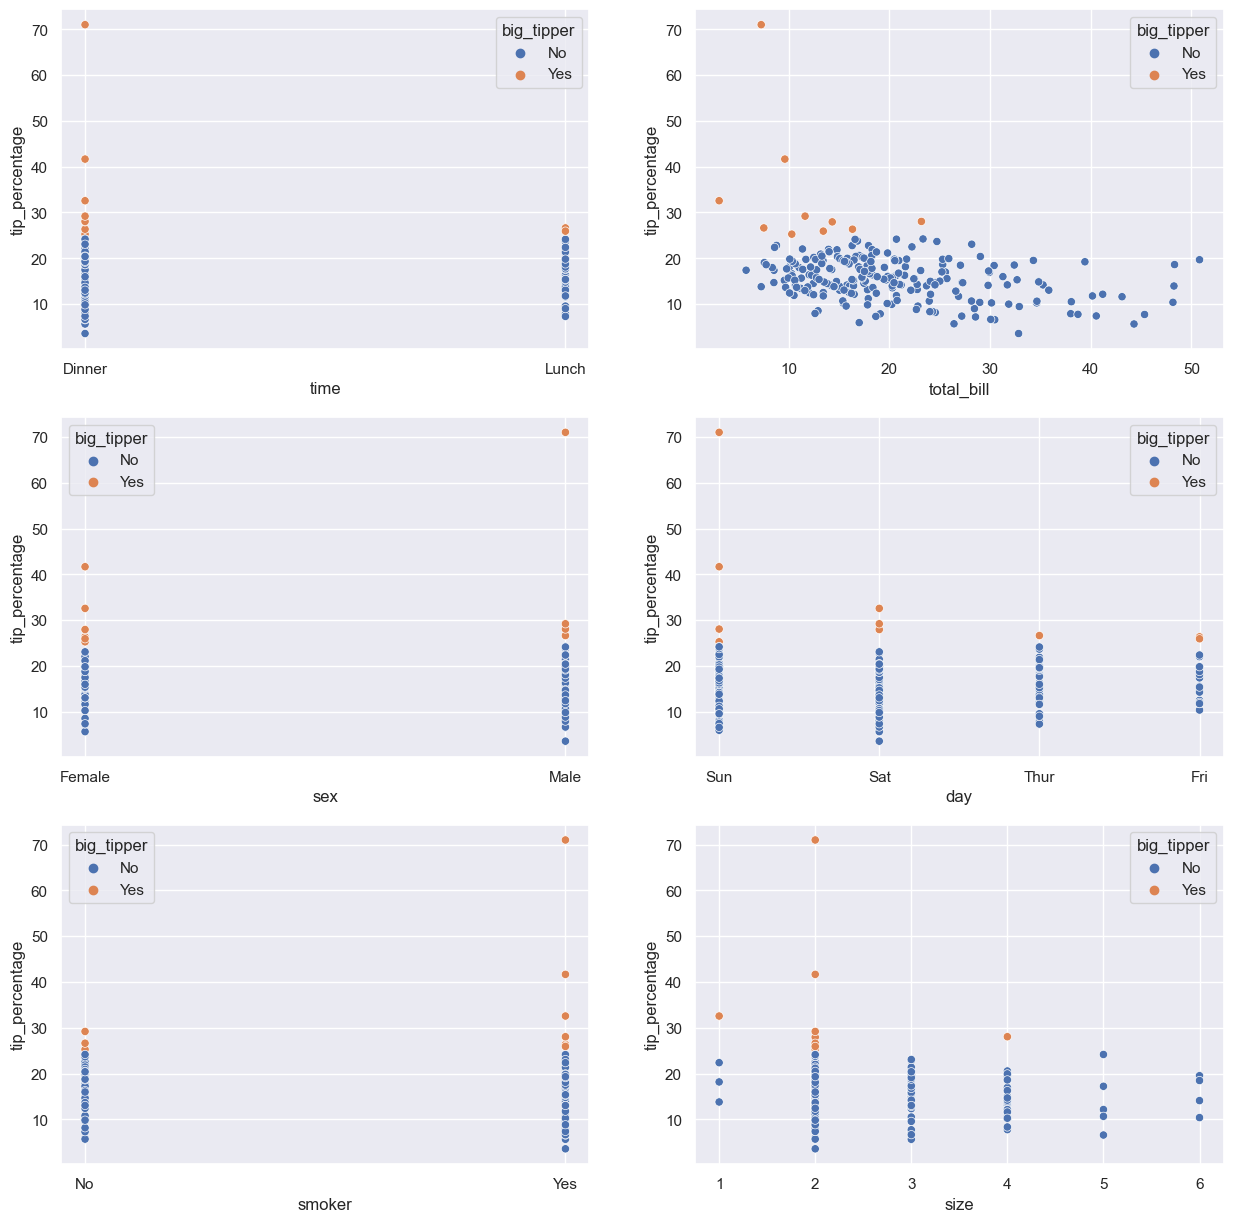

In [11]:
fig,ax=plt.subplots(3,2)
fig.set_size_inches(15,15)
sns.scatterplot(data=tips,y='tip_percentage',x='time',hue='big_tipper',ax=ax[0,0])
sns.scatterplot(data=tips,y='tip_percentage',x='total_bill',hue='big_tipper',ax=ax[0,1])
sns.scatterplot(data=tips,y='tip_percentage',x='sex',hue='big_tipper',ax=ax[1,0])
sns.scatterplot(data=tips,y='tip_percentage',x='day',hue='big_tipper',ax=ax[1,1])
sns.scatterplot(data=tips,y='tip_percentage',x='smoker',hue='big_tipper',ax=ax[2,0])
sns.scatterplot(data=tips,y='tip_percentage',x='size',hue='big_tipper',ax=ax[2,1])

Most big tippers have few distinguishable characteristics like 
1) Majority of them are from the total bills less than 25
2) Majority of them are the size is 2
3) Majority of them are from when the time is dinner.